# Random Forest Tree

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
train_dataset

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
categories_dataset

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [5]:
items_dataset

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [6]:
shops_dataset

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [7]:
test_dataset

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [9]:
from datetime import datetime
train_dataset['date'] = pd.to_datetime(train_dataset['date'])

In [10]:
train_dataset1 = train_dataset.merge(items_dataset, how='left', on='item_id')

In [11]:
train_dataset1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55
2935845,2015-09-10,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55
2935846,2015-10-14,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55
2935847,2015-10-22,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [12]:
train_dataset2 = train_dataset1.drop(['item_id', 'item_name'], axis=1)

In [13]:
train_dataset2

,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,2013-02-01,0,59,999.00,1.0,37
1,2013-03-01,0,25,899.00,1.0,58
2,2013-05-01,0,25,899.00,-1.0,58
3,2013-06-01,0,25,1709.05,1.0,58
4,2013-01-15,0,25,1099.00,1.0,56
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,299.00,1.0,55
2935845,2015-09-10,33,25,299.00,1.0,55
2935846,2015-10-14,33,25,349.00,1.0,55
2935847,2015-10-22,33,25,299.00,1.0,57


In [14]:
import datetime as dt
train_dataset2['date'] = train_dataset2['date'].map(dt.datetime.toordinal)

In [15]:
train_dataset2.isna().sum()

date                0
date_block_num      0
shop_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

In [16]:
train_dataset2

,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,734900,0,59,999.00,1.0,37
1,734928,0,25,899.00,1.0,58
2,734989,0,25,899.00,-1.0,58
3,735020,0,25,1709.05,1.0,58
4,734883,0,25,1099.00,1.0,56
...,...,...,...,...,...,...
2935844,735881,33,25,299.00,1.0,55
2935845,735851,33,25,299.00,1.0,55
2935846,735885,33,25,349.00,1.0,55
2935847,735893,33,25,299.00,1.0,57


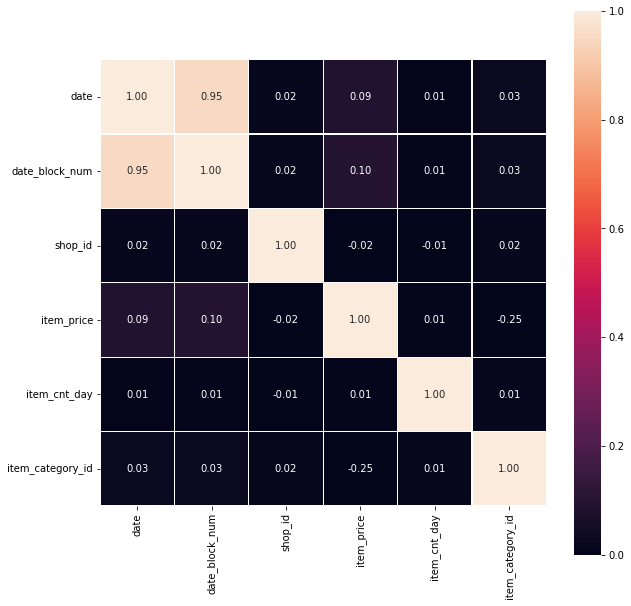

In [17]:
num_cols_heat = ['date', 'date_block_num', 'shop_id', 'item_price', 'item_cnt_day', 'item_category_id']
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_dataset2[num_cols_heat].corr(), square=True, vmin=0, annot=True, fmt='.2f', vmax=1, linewidths=.3)
plt.show()

In [18]:
train_dataset2 = train_dataset2.drop('date', axis=1)

In [19]:
train_dataset2

,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,0,59,999.00,1.0,37
1,0,25,899.00,1.0,58
2,0,25,899.00,-1.0,58
3,0,25,1709.05,1.0,58
4,0,25,1099.00,1.0,56
...,...,...,...,...,...
2935844,33,25,299.00,1.0,55
2935845,33,25,299.00,1.0,55
2935846,33,25,349.00,1.0,55
2935847,33,25,299.00,1.0,57


In [20]:
test_dataset1 = test_dataset.merge(items_dataset, how='left', on='item_id')

In [21]:
test_dataset1

,ID,shop_id,item_id,item_name,item_category_id
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19
1,1,5,5320,ONE DIRECTION Made In The A.M.,55
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23
4,4,5,5268,"Need for Speed [PS4, русская версия]",20
...,...,...,...,...,...
214195,214195,45,18454,СБ. Союз 55,55
214196,214196,45,16188,Настольная игра Нано Кёрлинг,64
214197,214197,45,15757,НОВИКОВ АЛЕКСАНДР Новая коллекция,55
214198,214198,45,19648,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40


In [22]:
test_dataset1 = test_dataset1.drop(['item_name'], axis=1)

In [23]:
price_dataset = train_dataset1.iloc[:, 3:5]
test_dataset1 = test_dataset1.merge(price_dataset, how='left', on='item_id')

In [24]:
test_dataset1

,ID,shop_id,item_id,item_category_id,item_price
0,0,5,5037,19,2599.0
1,0,5,5037,19,2599.0
2,0,5,5037,19,2599.0
3,0,5,5037,19,2599.0
4,0,5,5037,19,2599.0
...,...,...,...,...,...
60747493,214199,45,969,37,198.0
60747494,214199,45,969,37,198.0
60747495,214199,45,969,37,198.0
60747496,214199,45,969,37,198.0


In [25]:
test_dataset1 = test_dataset1.drop_duplicates(subset='ID')

In [26]:
test_dataset1

,ID,shop_id,item_id,item_category_id,item_price
0,0,5,5037,19,2599.0
1089,1,5,5320,55,NaN
1090,2,5,5233,19,1199.0
1540,3,5,5232,23,599.5
1670,4,5,5268,20,NaN
...,...,...,...,...,...
60746301,214195,45,18454,55,199.0
60746790,214196,45,16188,64,1223.0
60746794,214197,45,15757,55,199.0
60747165,214198,45,19648,40,99.0


In [27]:
test_dataset1 = test_dataset1.drop(['item_id'], axis=1)

In [28]:
test_dataset1

,ID,shop_id,item_category_id,item_price
0,0,5,19,2599.0
1089,1,5,55,NaN
1090,2,5,19,1199.0
1540,3,5,23,599.5
1670,4,5,20,NaN
...,...,...,...,...
60746301,214195,45,55,199.0
60746790,214196,45,64,1223.0
60746794,214197,45,55,199.0
60747165,214198,45,40,99.0


In [29]:
test_dataset1.isna().sum()

ID                      0
shop_id                 0
item_category_id        0
item_price          15246
dtype: int64

In [30]:
test_dataset1['date_block_num'] = 33

In [31]:
test_dataset1

,ID,shop_id,item_category_id,item_price,date_block_num
0,0,5,19,2599.0,33
1089,1,5,55,NaN,33
1090,2,5,19,1199.0,33
1540,3,5,23,599.5,33
1670,4,5,20,NaN,33
...,...,...,...,...,...
60746301,214195,45,55,199.0,33
60746790,214196,45,64,1223.0,33
60746794,214197,45,55,199.0,33
60747165,214198,45,40,99.0,33


In [32]:
test_dataset1.isna().sum()

ID                      0
shop_id                 0
item_category_id        0
item_price          15246
date_block_num          0
dtype: int64

In [33]:
X1 = train_dataset2.drop('item_cnt_day', axis=1).values
y1 = train_dataset2['item_cnt_day'].values

In [34]:
y1

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [35]:
X1

array([[  0.,  59., 999.,  37.],
       [  0.,  25., 899.,  58.],
       [  0.,  25., 899.,  58.],
       ...,
       [ 33.,  25., 349.,  55.],
       [ 33.,  25., 299.,  57.],
       [ 33.,  25., 299.,  55.]])

In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, verbose=1)
regressor.fit(X1_train, y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomForestRegressor(n_estimators=50, random_state=0, verbose=1)

In [38]:
y1_pred = regressor.predict(X1_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.8s finished


In [39]:
y1_pred

array([1.        , 2.59021983, 1.        , ..., 1.00064516, 1.        ,
       1.00333333])

In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
rmse

2.2335589907130444

In [41]:
X2 = test_dataset1.drop('ID', axis=1).values

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X2[:, 2:3])
X2[:, 2:3] = imputer.transform(X2[:, 2:3])

In [43]:
y2 = regressor.predict(X2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [44]:
y2

array([1.12533333, 1.29587585, 1.04      , ..., 1.68425829, 1.14498257,
       1.23078571])

In [45]:
submission = pd.DataFrame({'ID':test_dataset['ID'], 'item_cnt_month':y2.ravel()})
submission

,ID,item_cnt_month
0,0,1.125333
1,1,1.295876
2,2,1.040000
3,3,2.362830
4,4,1.242524
...,...,...
214195,214195,1.684258
214196,214196,1.091658
214197,214197,1.684258
214198,214198,1.144983


In [47]:
submission.to_csv('submission2.csv',index = False)